In [3]:
import os
os.chdir("..")
print(os.getcwd())

/Users/kim/Desktop/Quant-Research


In [4]:
from config import Config
from runner import load_and_slice_data, generate_position, run

In [5]:
cfg = Config(
    START="2023-01-01",
    END="2024-12-31",
)
print(cfg.DATA_PATH)

data/raw/SPY_20230101_20250101.csv


In [6]:
df = load_and_slice_data(cfg)
df.info()
print(df.head(10))

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 502 entries, 2023-01-03 to 2024-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   502 non-null    float64
 1   High    502 non-null    float64
 2   Low     502 non-null    float64
 3   Open    502 non-null    float64
 4   Volume  502 non-null    float64
dtypes: float64(5)
memory usage: 23.5 KB
                 Close        High         Low        Open       Volume
Price                                                                  
2023-01-03  366.069122  371.461808  363.194919  369.481603   74850700.0
2023-01-04  368.895172  370.933050  365.280805  368.337622   85934100.0
2023-01-05  364.684906  367.049611  364.088926  366.934264   76970500.0
2023-01-06  373.047852  374.172545  364.713697  367.789729  104189600.0
2023-01-09  372.836395  378.450211  372.653782  375.249181   73978100.0
2023-01-10  375.451050  375.518345  371.307998  372.250049   65358100.0
2

/Users/kim/Desktop/Quant-Research/data/loaders.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(path, index_col=0, parse_dates=True)
/Users/kim/Desktop/Quant-Research/data/loaders.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  idx = pd.to_datetime(df.index, errors="coerce")


In [7]:
df.head()
df.index.min(), df.index.max(), df.shape
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [8]:
price, price_ret, signal, position = generate_position(df, cfg)
# print(price, price_ret, signal, position)

signal.value_counts(dropna=False)
position.value_counts(dropna=False)
price_ret.notna().sum()

np.int64(501)

In [9]:
result, summary = run(cfg)
summary

/Users/kim/Desktop/Quant-Research/data/loaders.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(path, index_col=0, parse_dates=True)
/Users/kim/Desktop/Quant-Research/data/loaders.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  idx = pd.to_datetime(df.index, errors="coerce")


{'Annual Return': 0.1039372127030731,
 'Max Drawdown': -0.054455053271028064,
 'Sharpe': 1.0949895793833824,
 'Total Turnover': 43.0,
 'N_obs': 482}

以上五个metrics，分别表示了：
- 收益
- 风险
- 交易强度
- 样本可信度 (如果 N_obs < 200：任何 Sharpe 都不要太当真)

<Axes: title={'center': 'Equity Curve'}, xlabel='Price'>

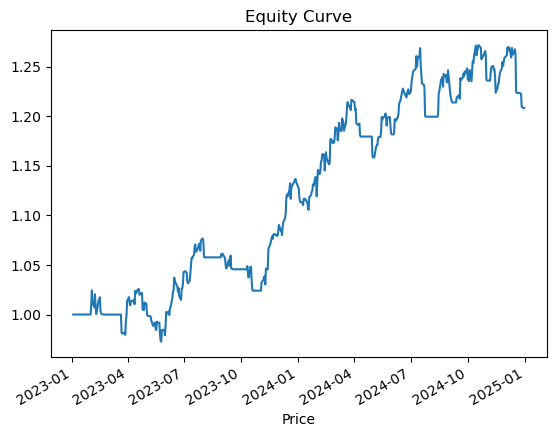

In [10]:
result["equity"].plot(title="Equity Curve")

In [11]:
result["position"].value_counts(dropna=False)

position
1.0    354
0.0    128
NaN     20
Name: count, dtype: int64

In [12]:
result[["ret", "turnover"]].describe()

,ret,turnover
count,482.000000,501.000000
mean,0.000410,0.087824
std,0.005946,0.283322
min,-0.029804,0.000000
25%,-0.001481,0.000000
50%,0.000000,0.000000
75%,0.003047,0.000000
max,0.020695,1.000000
